In [16]:
import psycopg2
import matplotlib.pyplot as plt 
import json

# database handling
conn = psycopg2.connect("dbname=datasets_fun user=postgres password=postgres")

In [17]:
# Fetch data

cur = conn.cursor()
cur.execute("select count(*) as c, d.gradska_cetvrt from dataset d group by d.gradska_cetvrt order by d.gradska_cetvrt")
data = cur.fetchall()


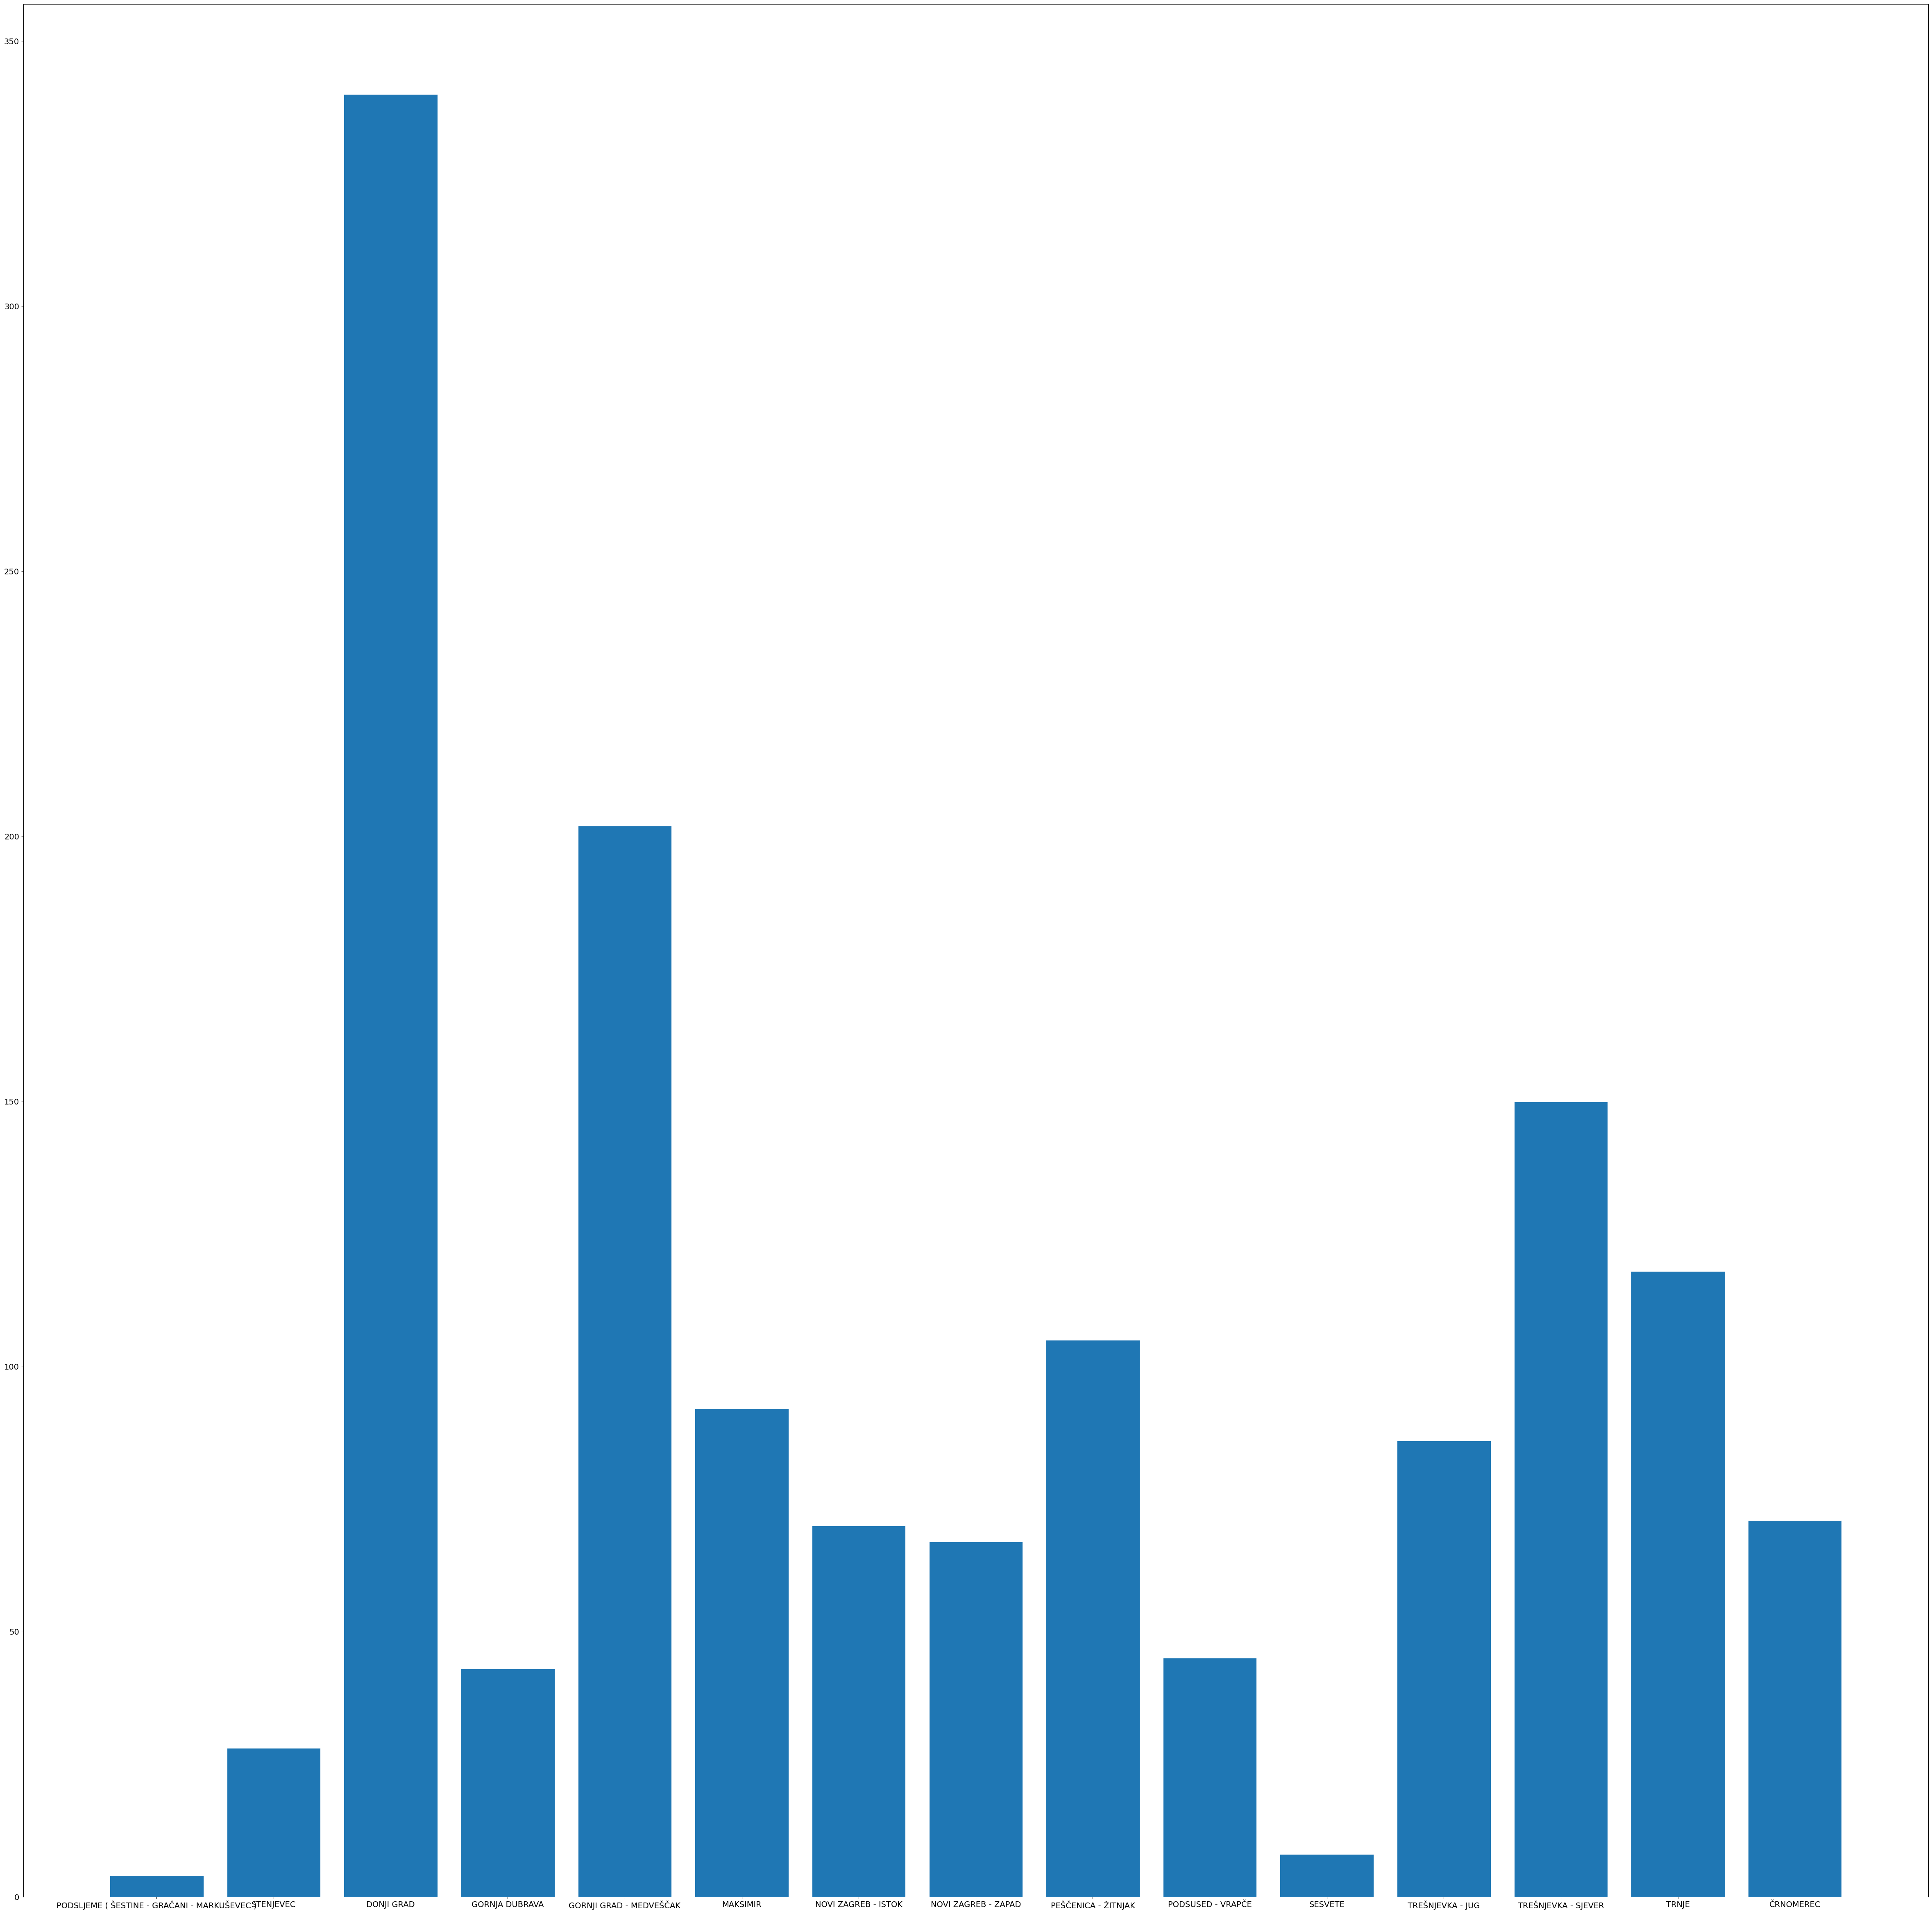

In [18]:
# Display data

data_json = dict(data)
plt.rcParams['font.size'] = '14'
fig, ax = plt.subplots(figsize=(60,60))
# data_json = {d[i] for d, i in data}

ax.bar(data_json.values(), data_json.keys(),edgecolor="white", linewidth=0.7)
plt.show()